# Azted G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()


In [3]:
sim_df.current_process.map(lambda x: x.leading_sequencer if x is not None else None).dropna().value_counts()

current_process
5ed8542f-11f4-45fc-8f60-517101839bc0    543
Name: count, dtype: int64

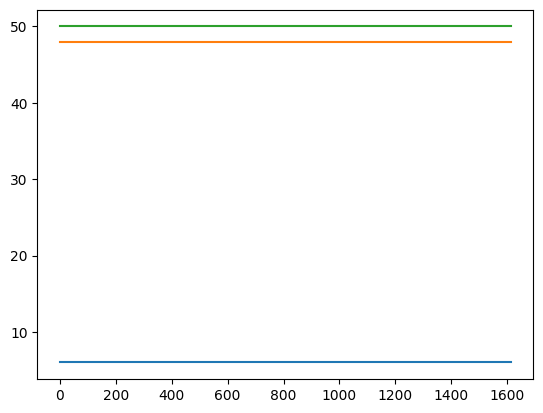

In [18]:
agent_labels = [i for i in sim_df['agents'].iloc[0].keys() if type(i) != str]
x = sim_df.time_l1
fig_df = sim_df.copy()
for i in agent_labels:
    fig_df[f'agent_{i}_staked'] = sim_df.agents.map(lambda x: x[i].staked_amount)
    y_i = fig_df[f'agent_{i}_staked']
    plt.plot(x, y_i)

In [4]:
#sim_df.to_csv("march4_test_data.csv")

<Axes: xlabel='timestep', ylabel='time_l1'>

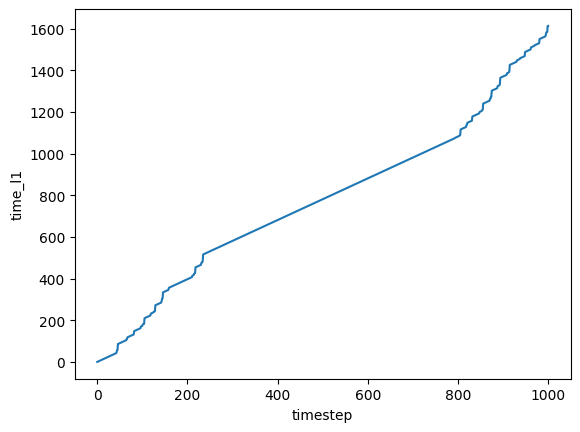

In [5]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [6]:
sim_df.head(4)

,subset,simulation,run,timestep,time_l1,delta_l1_blocks,advance_l1_blocks,slashes_to_provers,slashes_to_sequencers,total_rewards_provers,...,blob_gas_threshold_for_tx,proving_marketplace_usage_probability,rewards_to_provers,rewards_to_relay,gwei_to_tokens,gas_estimators,tx_estimators,slash_params,commit_bond_amount,op_costs
0,0,0,1,0,0,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
1,0,0,1,1,1,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
2,0,0,1,2,2,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0
3,0,0,1,3,3,0,0,0.0,0.0,0.0,...,50,0.3,0.3,0.01,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",10.0,0


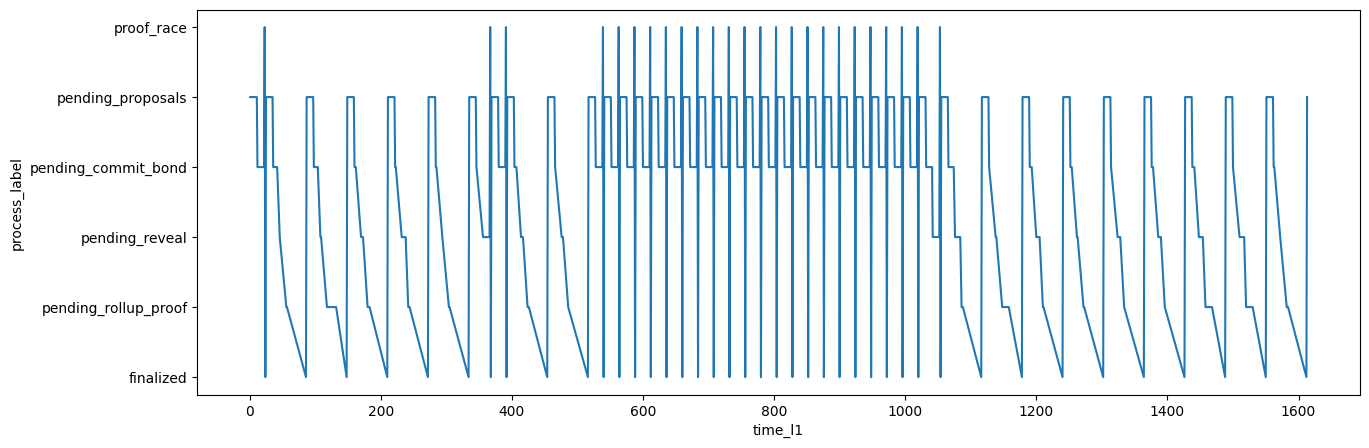

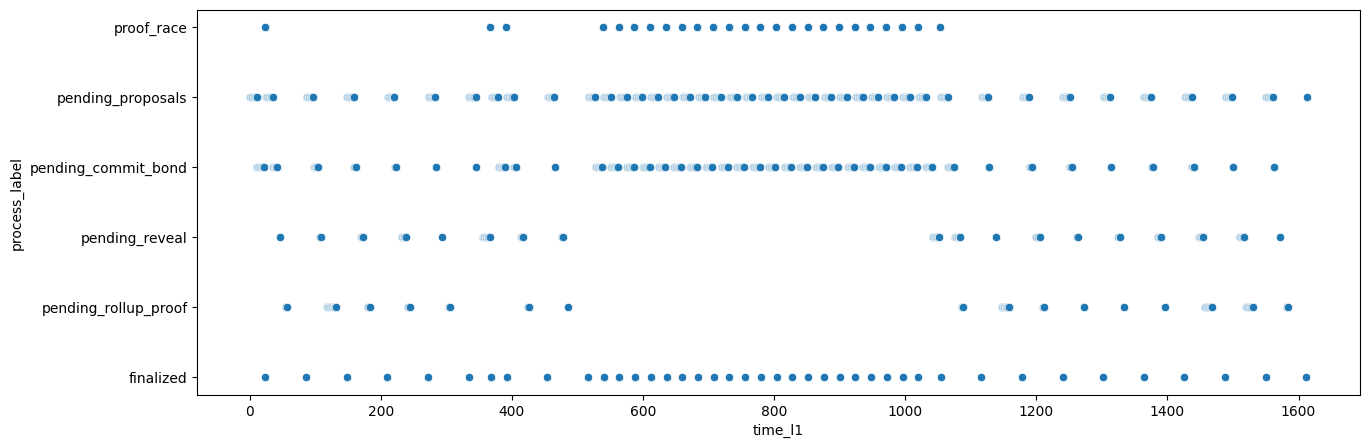

In [7]:
fig_df = sim_df.copy()
fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1, 
             y=fig_df.process_label)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=fig_df.time_l1, 
             y=fig_df.process_label)
plt.show()

In [8]:
fig_df.set_index('time_l1').sort_index().process_label

time_l1
0                       None
1          pending_proposals
2          pending_proposals
3          pending_proposals
4          pending_proposals
                ...         
1582    pending_rollup_proof
1583    pending_rollup_proof
1584    pending_rollup_proof
1612               finalized
1613       pending_proposals
Name: process_label, Length: 1001, dtype: object

In [9]:
sim_df.iloc[-1]

subset                                                                                     0
simulation                                                                                 0
run                                                                                        1
timestep                                                                                1000
time_l1                                                                                 1613
delta_l1_blocks                                                                            0
advance_l1_blocks                                                                          0
slashes_to_provers                                                                       0.0
slashes_to_sequencers                                                                   23.0
total_rewards_provers                                                               3.302013
total_rewards_relays                                                  

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

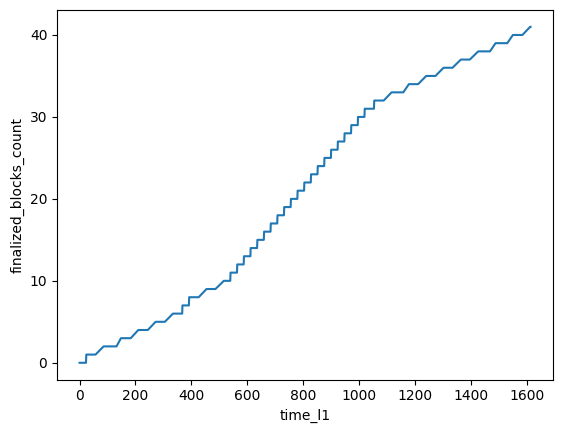

In [10]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

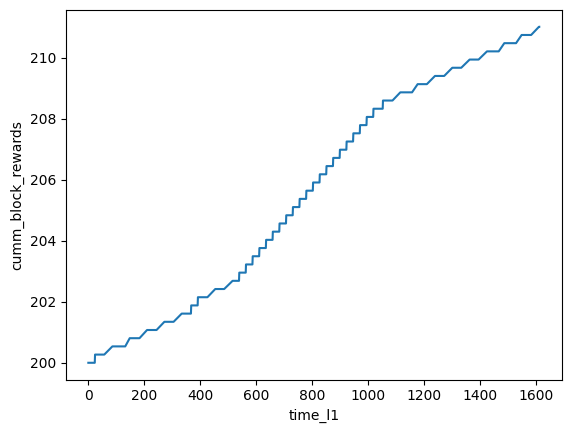

In [11]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

In [12]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Figure({
    'data': [{'hovertemplate': 'variable=balance_sequencers<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'balance_sequencers',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'balance_sequencers',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ..., 1584, 1612, 1613]),
              'xaxis': 'x',
              'y': array([304.25234899, 304.25234899, 304.25234899, ..., 304.25234899,
                          304.25234899, 304.25234899]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=balance_provers<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'balance_provers',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '

In [13]:
px.scatter(sim_df,
        x='time_l1',
        y=['gas_fee_l1', 'gas_fee_blob'])

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Figure({
    'data': [{'hovertemplate': 'variable=gas_fee_l1<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'gas_fee_l1',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'gas_fee_l1',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ..., 1584, 1612, 1613]),
              'xaxis': 'x',
              'y': array([50.,  1., 18., ..., 59., 41., 41.]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=gas_fee_blob<br>time_l1=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'gas_fee_blob',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'gas_fee_blob',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ..., 1584, 1612, 1613]),
              'xaxis': 'x',
       

In [14]:
px.histogram(sim_df,
        x=['gas_fee_l1'])

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'variable=gas_fee_l1<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'gas_fee_l1',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'gas_fee_l1',
              'offsetgroup': 'gas_fee_l1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([50.,  1., 18., ..., 59., 41., 41.]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [15]:
px.histogram(sim_df,
        x=['gas_fee_blob'])

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'variable=gas_fee_blob<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'gas_fee_blob',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'gas_fee_blob',
              'offsetgroup': 'gas_fee_blob',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 7.,  1., 14., ...,  1.,  1.,  1.]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [16]:
sim_df.gas_fee_l1.min()

1.0